## I will be predicting whether customers are likley to repsond to marketing campaigns

## Since this is a binary classification task, I will be looking at models like logistc regression, decison tree and KNN.

## The best model will be decided through muiltiple evaluation metrics like training/validation accurcay and things like ROC curve

## The best model that will be chosen will be the one that has the highest validation accuracy and has the least amount of overfitting

## This final model will be used to make predictions on an unseen test set to prodice a column of predictions whether they will repsond positively or negatively to a marketeing camapaign

## This column of predictions will be turned into a data frame and csv file and emailed to the appropriate parties in the company so that they can use this info

## One way they can use this info is that they can email the customers that are not predicted to respond positively and they can emial them to convince/persuade them to repsond positivley

## This will in turn increase the revenue of the company.

In [1]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv('marketing_campaign.csv', sep = ';')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [145]:
df.describe()

,Age,Income,Kidhome,Teenhome,Customer_Age,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.00000,2233.000000,2233.000000,2233.000000
mean,51.209136,52244.013002,0.444245,0.506046,6.971787,49.172414,304.033587,26.300940,167.113300,37.445141,27.108374,43.903269,2.321093,4.081505,2.661890,5.79176,5.316167,0.009404,0.148231
std,11.979248,25062.634030,0.538528,0.544675,0.683662,28.962114,336.953019,39.779532,225.870588,54.461569,41.321700,52.009602,1.932181,2.776886,2.921749,3.25473,2.425668,0.096541,0.355408
min,24.000000,1730.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,43.000000,35523.000000,0.000000,0.000000,7.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.00000,3.000000,0.000000,0.000000
50%,50.000000,51766.000000,0.000000,0.000000,7.000000,50.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.00000,6.000000,0.000000,0.000000
75%,61.000000,68316.000000,1.000000,1.000000,7.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.00000,7.000000,0.000000,0.000000
max,127.000000,666666.000000,2.000000,2.000000,8.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.00000,20.000000,1.000000,1.000000


In [39]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [40]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

## Data Cleaning:

In [41]:
#Drop the ID column
df = df.drop(['ID'], axis=1)

In [42]:
#Lets find out which column has missing values
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data
#Only the Income column has missing values, 24 of them, lets impute these missing values with the mean

,Total,%
Income,24,1.1
Response,0,0.0
Z_Revenue,0,0.0
Education,0,0.0
Marital_Status,0,0.0
Kidhome,0,0.0
Teenhome,0,0.0
Dt_Customer,0,0.0
Recency,0,0.0
MntWines,0,0.0


In [43]:
#Impute missing values with mean
df['Income']=df['Income'].fillna(df['Income'].mean())

In [44]:
#Lets convert year birth to age of the customer
df['Year_Birth'] = 2020 - df['Year_Birth']

#Rename the column to age
df = df.rename({'Year_Birth':'Age'}, axis='columns')
df

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,63,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,66,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,55,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,36,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,39,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,53,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,74,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,39,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,64,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [45]:
#Extract the year from the date
df['Dt_Customer'] = df['Dt_Customer'].str.slice(0, 4)

df['Dt_Customer'] = df['Dt_Customer'].astype(int)

#Lets chnage the column to how long has he been a customer = customer_age
df['Dt_Customer'] = 2020 - df['Dt_Customer']

df = df.rename({'Dt_Customer':'Customer_Age'}, axis='columns')
df

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Customer_Age,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,63,Graduation,Single,58138.0,0,0,8,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,66,Graduation,Single,46344.0,1,1,6,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,55,Graduation,Together,71613.0,0,0,7,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,36,Graduation,Together,26646.0,1,0,6,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,39,PhD,Married,58293.0,1,0,6,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,53,Graduation,Married,61223.0,0,1,7,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,74,PhD,Together,64014.0,2,1,6,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,39,Graduation,Divorced,56981.0,0,0,6,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,64,Master,Together,69245.0,0,1,6,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [46]:
#Replace certain instances with the new terms as they were not understandabke before
df["Education"].replace({"2n Cycle": "High School", "Basic": "Middle School", "Graduation": "Undergrad"}, inplace=True)

In [47]:
#Remove records with YOLO, absurd and alone in it
df = df[df['Marital_Status'] != 'YOLO']
df = df[df['Marital_Status'] != 'Absurd']
df = df[df['Marital_Status'] != 'Alone']

In [48]:
#Drop more unneeded variables
df = df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Z_Revenue', 'Z_CostContact'], axis=1)
df

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Customer_Age,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,63,Undergrad,Single,58138.0,0,0,8,58,635,88,...,172,88,88,3,8,10,4,7,0,1
1,66,Undergrad,Single,46344.0,1,1,6,38,11,1,...,2,1,6,2,1,1,2,5,0,0
2,55,Undergrad,Together,71613.0,0,0,7,26,426,49,...,111,21,42,1,8,2,10,4,0,0
3,36,Undergrad,Together,26646.0,1,0,6,26,11,4,...,10,3,5,2,2,0,4,6,0,0
4,39,PhD,Married,58293.0,1,0,6,94,173,43,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,53,Undergrad,Married,61223.0,0,1,7,46,709,43,...,42,118,247,2,9,3,4,5,0,0
2236,74,PhD,Together,64014.0,2,1,6,56,406,0,...,0,0,8,7,8,2,5,7,0,0
2237,39,Undergrad,Divorced,56981.0,0,0,6,91,908,48,...,32,12,24,1,2,3,13,6,0,0
2238,64,Master,Together,69245.0,0,1,6,8,428,30,...,80,30,61,2,6,5,10,3,0,0


## Lets do some visualization:

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

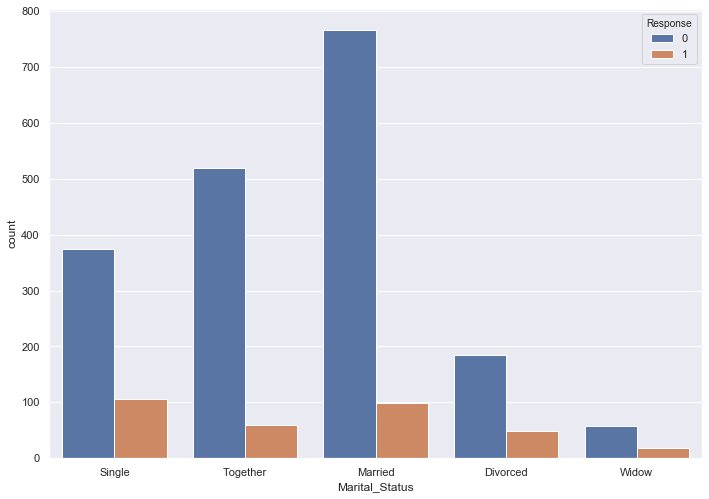

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x ='Marital_Status', hue = "Response", data = df)

plt.show()

In [157]:
## most yes repsonses are coming from married people and single people

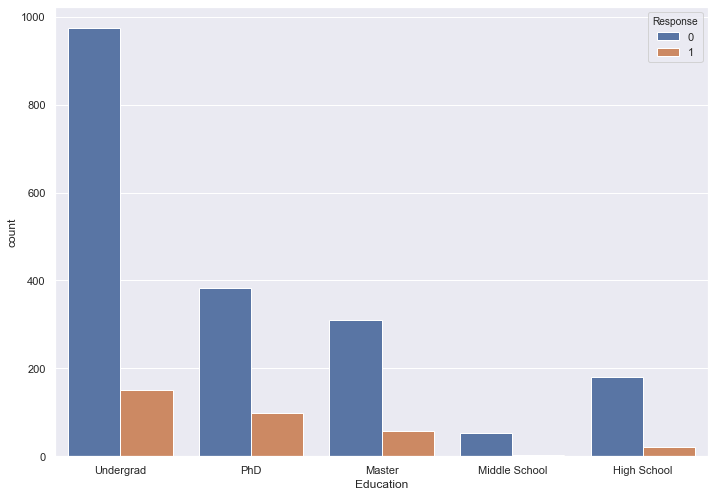

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x ='Education', hue = "Response", data = df)

plt.show()

In [161]:
## Most yes repsonses are coming from Undergrad and PHD students, so good idea to target them for emailing

Text(0, 0.5, 'Frequency')

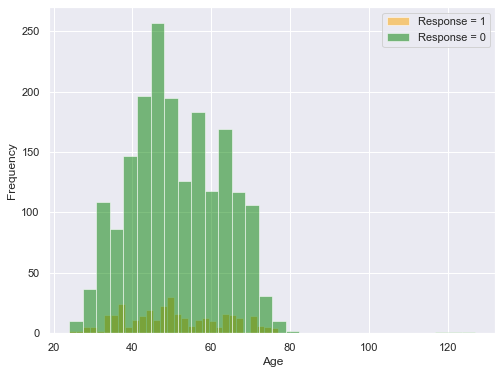

In [52]:
plt.figure(figsize=(8,6))
df[df['Response']==1]['Age'].hist(bins=30,color='orange', alpha=0.5, label='Response = 1')
df[df['Response']==0]['Age'].hist(bins=30,color='green', alpha=0.5, label='Response = 0')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Frequency")

In [162]:
## lot of peopel who are responding no are in the 40-60 age range, target them more for emailing

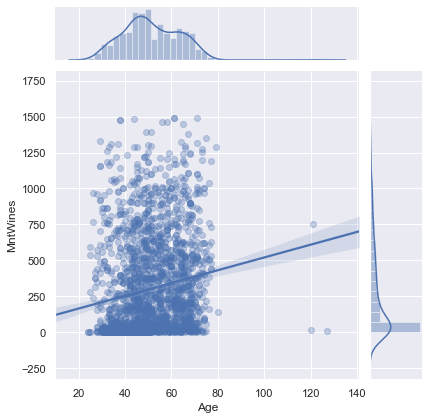

In [58]:
sns.jointplot(x = "Age", y = "MntWines", data = df, kind='reg',joint_kws = {'scatter_kws':dict(alpha=0.3)})

plt.show()

In [163]:
## As age increases, amount spent on wine increases, target wine to older customers more

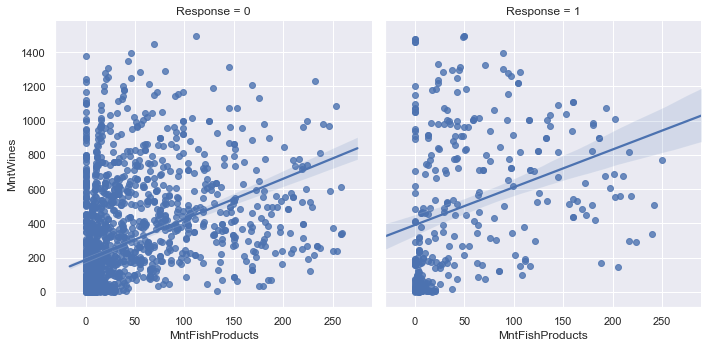

In [62]:
sns.lmplot(x="MntFishProducts", y="MntWines", col="Response", data=df)
plt.show()

In [164]:
## If you responded yes, the correlation between amount spent on fish and wines is higher as opposed to
## someone who repsonded no, either way spending on fish and wine is correlated, so maybe have some
##offers of buy one get one free to increase sales

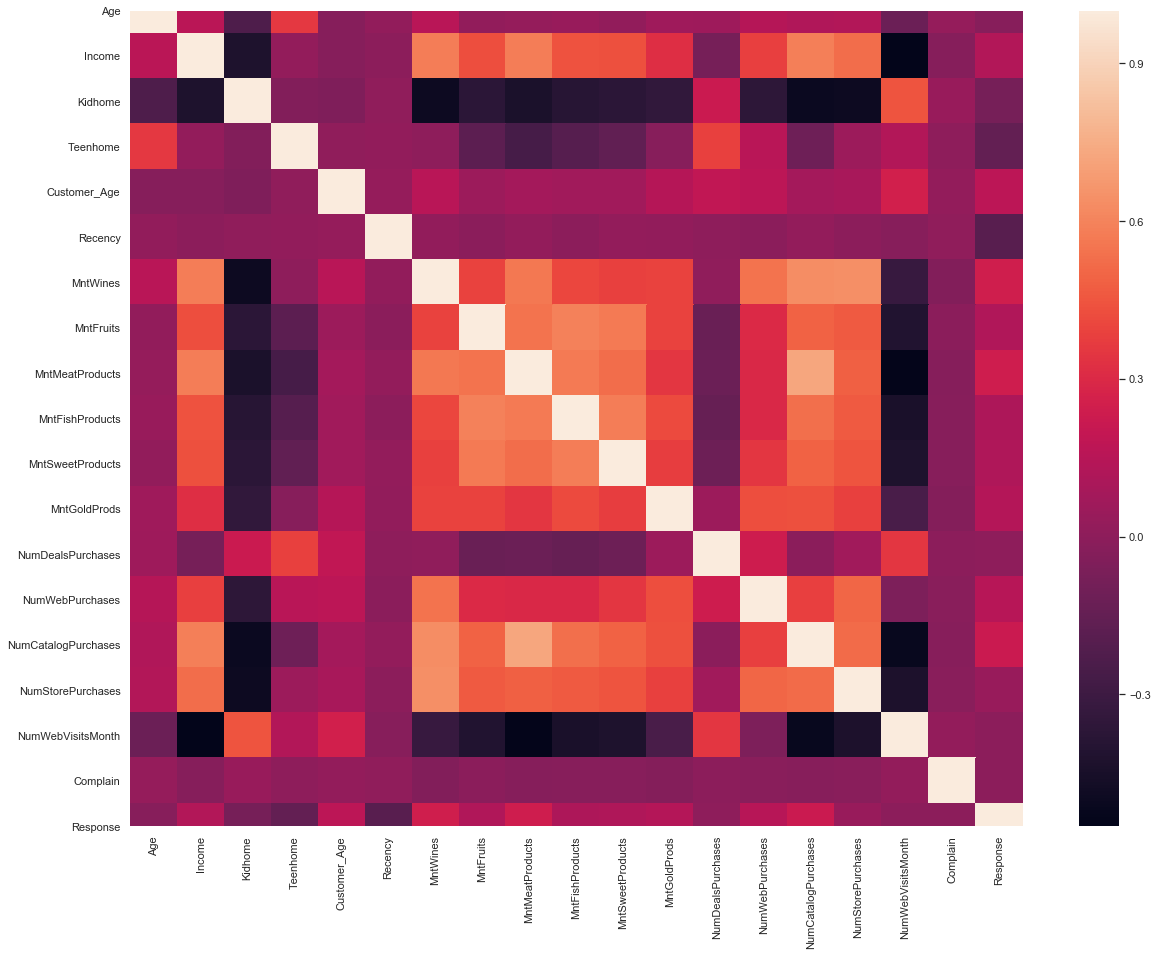

In [63]:
corr = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr)

In [146]:
#lets subset the data into people who responded to marketing and didnt
yes_df = df[(df['Response'] == 1)]

no_df = df[(df['Response'] == 0)]

In [147]:
#lets compare their statitical summaries
yes_df.describe()

,Age,Income,Kidhome,Teenhome,Customer_Age,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.0
mean,50.676737,60237.260578,0.341390,0.302115,7.250755,35.407855,504.818731,38.232628,296.468278,51.858006,38.785498,61.075529,2.332326,5.081571,4.205438,6.105740,5.299094,0.009063,1.0
std,12.383079,23197.030433,0.487489,0.491715,0.687964,27.699576,428.156156,46.086581,287.286123,61.395250,46.436329,56.820694,2.113050,2.557696,3.119844,3.087266,2.566326,0.094913,0.0
min,24.000000,7500.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.0
25%,41.000000,39810.500000,0.000000,0.000000,7.000000,11.000000,96.000000,4.000000,48.500000,4.000000,3.000000,20.000000,1.000000,3.000000,1.000000,4.000000,3.000000,0.000000,1.0
50%,49.000000,64090.000000,0.000000,0.000000,7.000000,30.000000,448.000000,21.000000,184.000000,25.000000,20.000000,39.000000,1.000000,5.000000,4.000000,6.000000,6.000000,0.000000,1.0
75%,61.000000,80676.000000,1.000000,1.000000,8.000000,56.000000,886.000000,53.500000,513.000000,83.500000,57.000000,84.500000,3.000000,7.000000,6.000000,8.000000,8.000000,0.000000,1.0
max,77.000000,105471.000000,2.000000,2.000000,8.000000,99.000000,1492.000000,193.000000,981.000000,250.000000,198.000000,241.000000,11.000000,11.000000,11.000000,13.000000,10.000000,1.000000,1.0


In [148]:
no_df.describe()

,Age,Income,Kidhome,Teenhome,Customer_Age,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
count,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.0
mean,51.301788,50852.969391,0.462145,0.541535,6.923239,51.567823,269.091483,24.224501,144.601998,34.936909,25.076236,40.914826,2.319138,3.907466,2.393270,5.737119,5.319138,0.009464,0.0
std,11.908488,25120.397646,0.545063,0.545759,0.671347,28.511990,305.356435,38.211647,205.311805,52.779814,40.032364,50.549470,1.899539,2.777352,2.801126,3.280709,2.401043,0.096846,0.0
min,24.000000,1730.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,43.000000,34560.000000,0.000000,0.000000,6.000000,27.000000,21.250000,1.000000,14.000000,2.000000,1.000000,7.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.0
50%,50.000000,50567.000000,0.000000,1.000000,7.000000,52.000000,151.500000,7.000000,56.000000,11.000000,7.000000,21.000000,2.000000,3.000000,1.000000,5.000000,6.000000,0.000000,0.0
75%,61.000000,65985.250000,1.000000,1.000000,7.000000,77.000000,443.750000,28.000000,192.750000,43.000000,30.000000,53.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.0
max,127.000000,666666.000000,2.000000,2.000000,8.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,0.0


In [149]:
## If they said yes to the marketing camapign, their mean income was higher at around 60 K vs 50 K
## If they said yed, they have been a customer longer(Customer_Age)
## If they said yes, they made a purchase more recently at 35 days gao bs 51 days ago if they daid no

In [151]:
## Lets look at the relationship between education and marital status

cross_tab = pd.crosstab(df.Education, df.Marital_Status)
cross_tab

Marital_Status,Divorced,Married,Single,Together,Widow
Education,,,,,
High School,23,81,37,57,5
Master,37,138,75,106,12
Middle School,1,20,18,14,1
PhD,52,192,98,117,24
Undergrad,119,433,252,286,35


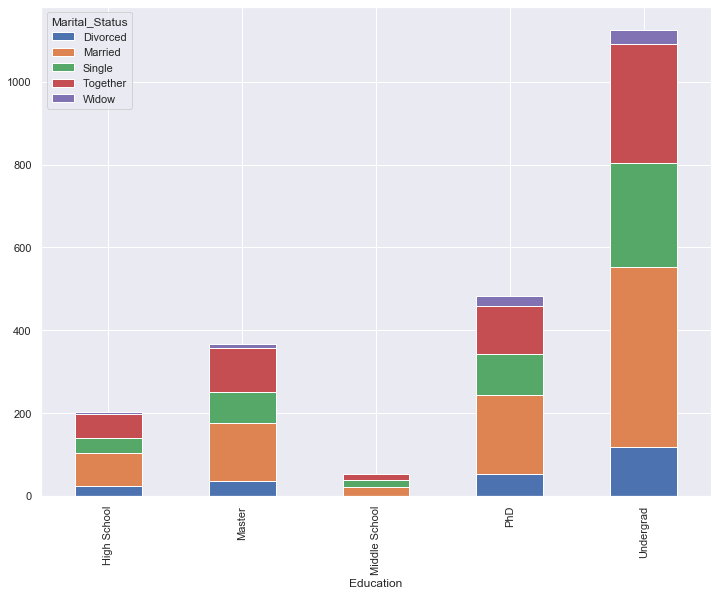

In [154]:
cross_tab.plot.bar(stacked=True, figsize=(12,9))

In [158]:
## Married people are giving the 2nd most yes repsonses, diving a bit deeper, we can see that the most number of
## married people canbe found in the undergrad population
## so good idea to target undergrads.

In [150]:
## Lets prepare data for ML now

In [68]:
## Lets do some one hot encoding for the categorical varaibles
df_dummies = pd.get_dummies(df, prefix=['Education', 'Marital_Status'], columns=['Education', 'Marital_Status'])
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 0 to 2239
Data columns (total 29 columns):
Age                        2233 non-null int64
Income                     2233 non-null float64
Kidhome                    2233 non-null int64
Teenhome                   2233 non-null int64
Customer_Age               2233 non-null int64
Recency                    2233 non-null int64
MntWines                   2233 non-null int64
MntFruits                  2233 non-null int64
MntMeatProducts            2233 non-null int64
MntFishProducts            2233 non-null int64
MntSweetProducts           2233 non-null int64
MntGoldProds               2233 non-null int64
NumDealsPurchases          2233 non-null int64
NumWebPurchases            2233 non-null int64
NumCatalogPurchases        2233 non-null int64
NumStorePurchases          2233 non-null int64
NumWebVisitsMonth          2233 non-null int64
Complain                   2233 non-null int64
Response                   2233 non-null int6

In [73]:
#Lets separate out the features and target
X = df_dummies.drop('Response', axis=1)
y = df_dummies.Response

In [74]:
#Lets get a training, validation and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=555)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=555)

In [75]:
# Standardization of the data
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)
X_train

array([[0.2371134 , 0.11605779, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25773196, 0.05326828, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.28865979, 0.064137  , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21649485, 0.06680192, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31958763, 0.06164503, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.20618557, 0.07137078, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)

#training accurcay
metrics.accuracy_score(y_true = y_train, y_pred = y_pred)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8698435277382646

In [79]:
#validation accuracy
y_pred = logreg.predict(X_val)
metrics.accuracy_score(y_true = y_val, y_pred = y_pred)

0.8623548922056384

In [80]:
##Pretty high validation accuracy of 0.86 and not much overfitting

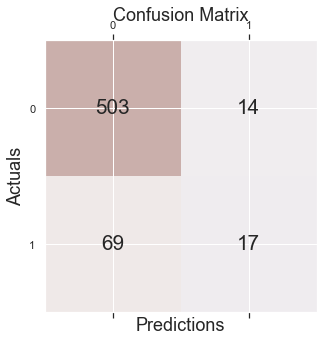

In [81]:
from sklearn.metrics import confusion_matrix
conf_matrix1 = confusion_matrix(y_true=y_val, y_pred= y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix1, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix1.shape[0]):
    for j in range(conf_matrix1.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [91]:
##Lets do hyperparam optimzation with startified K fold since this is imbalanced data set

In [88]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

gs = GridSearchCV(estimator=logreg, param_grid=grid_values, scoring='f1', cv=cv, n_jobs=-1, )
gs.fit(X_train, y_train)
gs.best_estimator_
best_estimator = gs.best_estimator_
pred = best_estimator.predict(X_val)
print(metrics.classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       517
           1       0.53      0.21      0.30        86

    accuracy                           0.86       603
   macro avg       0.70      0.59      0.61       603
weighted avg       0.83      0.86      0.83       603



/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [89]:
## The validation accurcay hasnt changed with hyperparam optimzation

#The estimator with these params were chosen by gridSearch
gs.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
## Gridsearch CV only gives you params to maximize accuracy, we need to tune the param to account for overfitting
## as well so lets tune the param C more closesly with validation curves

from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C = 0.001 Train = 0.8485059707394227 Test = 0.8484995330758942
C = 0.005 Train = 0.8485059707394227 Test = 0.8484995330758942
C = 0.01 Train = 0.8485059707394227 Test = 0.8484995330758942
C = 0.05 Train = 0.8493951759588769 Test = 0.8492112768481361
C = 0.1 Train = 0.855796915776987 Test = 0.85276747179526
C = 0.5 Train = 0.8705548438117834 Test = 0.8634461522929759
C = 1 Train = 0.8723332542506921 Test = 0.8662906034678579
C = 2 Train = 0.8716219849742981 Test = 0.8691375785568258
C = 10 Train = 0.8737557928034796 Test = 0.8641604199793038
C = 50 Train = 0.8735780150257018 Test = 0.8634512001211478


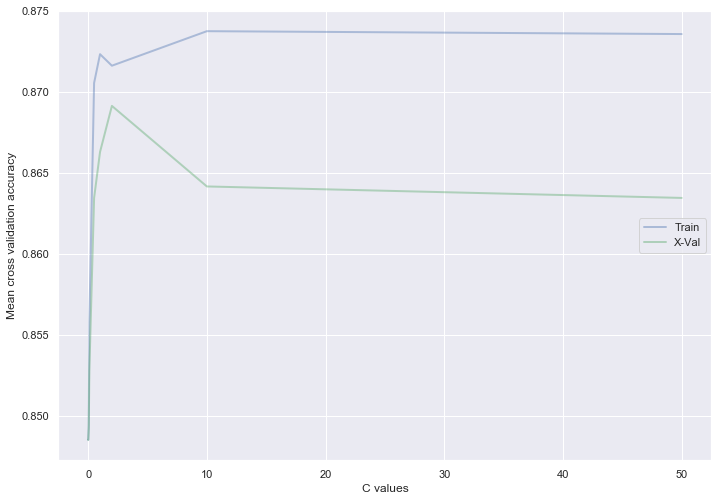

In [90]:
C_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50]
train_scores, test_scores = calc_params(X_train, y_train, logreg, C_list, 'C', 5)

In [92]:
## From the validation curve you can see that C = 3 is the best option as it gives you highest validation accurcay
## and lowest amount of overfitting

In [93]:
## Lets try KNN now

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)  
y_pred = knn.predict(X_train)  

In [101]:
#training accurcay
metrics.accuracy_score(y_true = y_train, y_pred = y_pred)

0.8918918918918919

In [102]:
#validation accuracy
y_pred = knn.predict(X_val)
metrics.accuracy_score(y_true = y_val, y_pred = y_pred)

0.8507462686567164

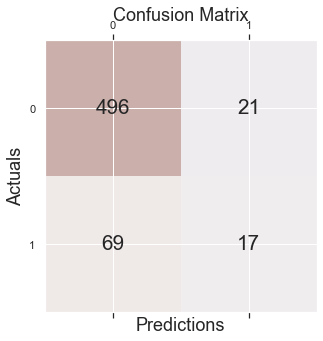

In [103]:
from sklearn.metrics import confusion_matrix
conf_matrix1 = confusion_matrix(y_true=y_val, y_pred= y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix1, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix1.shape[0]):
    for j in range(conf_matrix1.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [98]:
grid_values = {'n_neighbors': [1,3,5,7,9,15,19,25,29,35,39,45,49,99]}

gs = GridSearchCV(estimator=knn, param_grid=grid_values, scoring='f1', cv=cv, n_jobs=-1, )
gs.fit(X_train, y_train)
gs.best_estimator_
best_estimator = gs.best_estimator_
pred = best_estimator.predict(X_val)
print(metrics.classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       517
           1       0.40      0.37      0.39        86

    accuracy                           0.83       603
   macro avg       0.65      0.64      0.64       603
weighted avg       0.83      0.83      0.83       603



/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [105]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [106]:
## accuracy actually went down with gridsearch so we will tune another way

n_neighbors = 1 Train = 0.9957328588374852 Test = 0.8243027687337523
n_neighbors = 3 Train = 0.9078937129300119 Test = 0.8499255445344641
n_neighbors = 5 Train = 0.8867356267299329 Test = 0.857037934428712
n_neighbors = 7 Train = 0.8751778568604192 Test = 0.8584488024027663
n_neighbors = 9 Train = 0.8732216686437326 Test = 0.8655637162111003
n_neighbors = 15 Train = 0.8586410438908659 Test = 0.8570303626864542
n_neighbors = 19 Train = 0.8538402530644523 Test = 0.8513389364226042
n_neighbors = 25 Train = 0.8508173981810992 Test = 0.8492112768481362
n_neighbors = 29 Train = 0.8501061289047055 Test = 0.8492087529340502
n_neighbors = 35 Train = 0.8485059707394227 Test = 0.8484995330758942
n_neighbors = 39 Train = 0.8485059707394227 Test = 0.8484995330758942
n_neighbors = 45 Train = 0.8485059707394227 Test = 0.8484995330758942
n_neighbors = 49 Train = 0.8485059707394227 Test = 0.8484995330758942
n_neighbors = 99 Train = 0.8485059707394227 Test = 0.8484995330758942


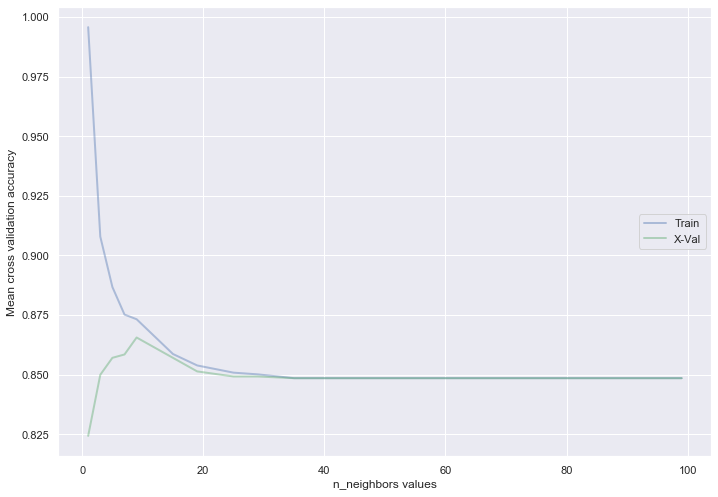

In [104]:
#Lets see if we can tune the K param more closely 
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
train_scores, test_scores = calc_params(X_train, y_train, knn, K_list, 'n_neighbors', 5)

In [107]:
## K = 9 is the one to pick as high validation accuracy and last overfitting, giving 0.865 validation acc

In [108]:
##Lets try decision tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)

#training accurcay
metrics.accuracy_score(y_true = y_train, y_pred = y_pred)

0.9950213371266002

In [110]:
#testing accuracy
y_pred = dt.predict(X_val)
metrics.accuracy_score(y_true = y_val, y_pred = y_pred)

0.814262023217247

In [111]:
## Very high amount of overfitting

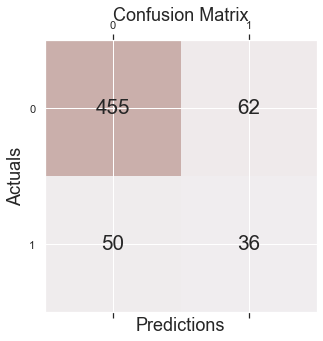

In [112]:
from sklearn.metrics import confusion_matrix
conf_matrix1 = confusion_matrix(y_true=y_val, y_pred= y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix1, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix1.shape[0]):
    for j in range(conf_matrix1.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [113]:
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,None]
)

gs = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )
gs.fit(X_train, y_train)
gs.best_estimator_
best_estimator = gs.best_estimator_
pred = best_estimator.predict(X_val)
print(metrics.classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       517
           1       0.33      0.29      0.31        86

    accuracy                           0.82       603
   macro avg       0.61      0.60      0.60       603
weighted avg       0.81      0.82      0.81       603



/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [114]:
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [133]:
## Since Decsion Tree has a very high amount of overfitting, lets try to reduce the amount of overfitting
## by using a PCA transformed data set to reduce dimensionality, lets do some PCA:

In [134]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([1.67475626e-01, 1.56441282e-01, 1.16588087e-01, 9.72748207e-02,
       8.83253739e-02, 6.13472141e-02, 5.58432507e-02, 5.26905290e-02,
       4.06167984e-02, 3.71814016e-02, 2.03426590e-02, 1.79643561e-02,
       1.54809134e-02, 1.15228920e-02, 1.03971834e-02, 8.48036157e-03,
       7.86772877e-03, 6.43542760e-03, 6.20956140e-03, 5.59841505e-03,
       5.19924302e-03, 4.12594541e-03, 2.60147712e-03, 2.09977807e-03,
       1.46266835e-03, 4.27005616e-04, 3.30287436e-32, 3.32027357e-33])

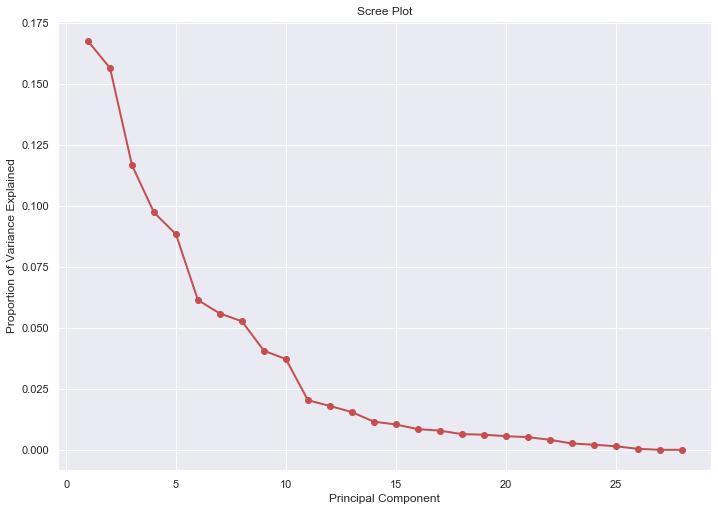

In [135]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [136]:
## From the scree plot, the knee is around 10 - 15 components
##lets check the cumulative variance captured by component to find exact no. of compoenents to keep
pd.DataFrame(pca.explained_variance_ratio_.cumsum())

,0
0,0.167476
1,0.323917
2,0.440505
3,0.537780
4,0.626105
5,0.687452
6,0.743296
7,0.795986
8,0.836603
9,0.873784


In [137]:
## lets take 15 PC's, they capture about 95% of the total variance and that is how much we want to usually capture
## in an ML situation for dimensionality reduction

## Now lets transform and reduce our data set to 15 components

pca = decomposition.PCA(n_components = 15)
pca_train = pca.fit_transform(X_train)
pca_val = pca.fit_transform(X_val)
pca_train.shape

(1406, 15)

In [142]:
pca_val.shape

(603, 15)

In [138]:
#Now we only have 15 columns in the PCA reduced data set, lets fit it to the Decsion Tree clf

In [139]:
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dt.fit(pca_train, y_train)
y_pred = dt.predict(pca_train)

#training accurcay
metrics.accuracy_score(y_true = y_train, y_pred = y_pred)

0.933854907539118

In [140]:
#validation accuracy
y_pred = dt.predict(pca_val)
metrics.accuracy_score(y_true = y_val, y_pred = y_pred)

0.6799336650082919

In [141]:
## The overfitting has actually increased, so PCA transformation is not helping in this case

In [115]:
## Out of these 3 I  will pick logistic regression as
## it has pretty high validation accuracy of 0.86 and not much overfitting

In [123]:
## Lets try to use a bagging method for our chosen logisic regression to see if it incresases validation accuracy
## any more or reduces overfitting

from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), max_samples=0.5, max_features=0.5,
                           n_estimators=25, random_state=5)
bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_train)

#training accurcay
metrics.accuracy_score(y_true = y_train, y_pred = y_pred)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.8541963015647226

In [124]:
#testing accuracy
y_pred = bagging.predict(X_val)
metrics.accuracy_score(y_true = y_val, y_pred = y_pred)

0.8606965174129353

In [118]:
## it does not increase validation accuracy but it does deacrease overfitting even more

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

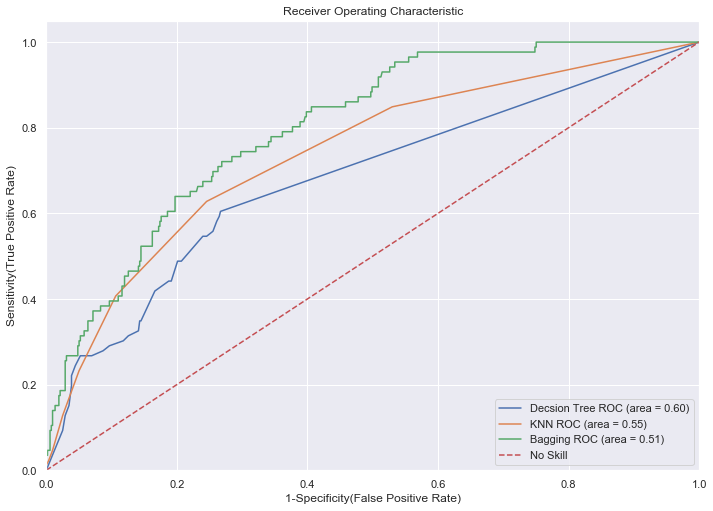

In [125]:
## Lets compare all the models with ROC curves to pick the best one

models = [
{
    'label': 'Decsion Tree',
    'marker': 'o',
    'model': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'),
},
{
    'label': 'KNN',
    'marker': 'x',
    'model': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform'),
},
{
    'label': 'Bagging',
    'marker': '>',
    'model': BaggingClassifier(LogisticRegression(), max_samples=0.5, max_features=0.5,
                           n_estimators=25, random_state=5),
}
]
# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_val) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_val, model.predict_proba(X_val)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_val,model.predict(X_val))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [126]:
## The ROC curve that goes closer to the top left corner is the best classifier
## and the one that has higher AUC and that is Bagging with logistic regression

## WINNER MODEL: Bagging with logistic Regression, it classifies the best according to ROC and has no overfitting

In [131]:
## Lets use our winner model on unseen test set

In [128]:
bagging = BaggingClassifier(LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), max_samples=0.5, max_features=0.5,
                           n_estimators=25, random_state=5)
bagging.fit(X_train, y_train)

final_pred = bagging.predict(X_test)
final_pred

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [129]:
# The data frame of final predictions
final_pred = pd.DataFrame(final_pred)
final_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
219,0
220,0
221,0
222,0


In [130]:
#Convert to a csv and email it colleagues who need it
final_pred.to_csv('final_predictions.csv')

## Thank you and have a nice summer break!!